In [23]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('../..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

sn.set(style="darkgrid")
sn.set_context('talk')

# Vientos

### Maitenes

In [24]:
params = ['SO2','NO2', 'NO', 'NOX', 'O3', 'CO']
from_last = '5y'

maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)

cols_to_drop = list(maitenes_df.filter(regex='(?<!no validados)_.*')) 
maitenes_df = maitenes_df.drop(cols_to_drop, axis=1)

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\1089860577.py:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  maitenes_df = get_minma_data(params, 'maitenes', from_last=from_last)


In [25]:
maitenes_df.rename({'Registros no validados_SO2': 'SO2', 'Registros no validados_NO2': 'NO2', 'Registros no validados_NO': 'NO',
 'Registros no validados_NOX': 'NOX', 'Registros no validados_O3': 'O3', 'Registros no validados_CO': 'CO'}, axis=1, inplace=True)
 
maitenes_df.head()

,SO2,NO2,NO,NOX,O3,CO
2017-12-03 18:00:00,3.10,5.44,1.56728,7.00835,19.0,0.11
2017-12-03 19:00:00,3.10,5.57,1.28538,6.85448,19.0,0.12
2017-12-03 20:00:00,3.06,5.57,1.62832,7.19620,18.0,0.13
2017-12-03 21:00:00,3.11,5.48,1.50225,6.98545,16.0,0.14
2017-12-03 22:00:00,3.33,6.21,1.33768,7.54582,13.0,0.15


In [26]:
vientos = ['dirviento','velviento'] # NO HAY CO
from_last = '5y'

maitenes_vientos = get_minma_data(vientos, 'maitenes', from_last=from_last, n_cols=3)
maitenes_vientos.rename({'Unnamed: 2_dirviento': 'dirviento', 'Unnamed: 2_velviento': 'velviento'}, axis=1, inplace=True)
maitenes_vientos.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\3141275214.py:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  maitenes_vientos = get_minma_data(vientos, 'maitenes', from_last=from_last, n_cols=3)


,dirviento,velviento
2017-12-04 18:00:00,277.339,1.318880
2017-12-04 19:00:00,248.772,0.631220
2017-12-04 20:00:00,212.997,0.705615
2017-12-04 21:00:00,212.770,0.774291
2017-12-04 22:00:00,215.067,0.616374


In [27]:
maitenes = pd.merge(maitenes_df, maitenes_vientos, left_index=True, right_index=True)
maitenes

,SO2,NO2,NO,NOX,O3,CO,dirviento,velviento
2017-12-04 18:00:00,19.77,10.07,5.52467,15.59110,14.0,0.26,277.3390,1.318880
2017-12-04 19:00:00,3.78,6.37,1.37122,7.74032,17.0,0.24,248.7720,0.631220
2017-12-04 20:00:00,3.65,5.75,1.72888,7.48010,17.0,0.24,212.9970,0.705615
2017-12-04 21:00:00,3.75,5.95,1.63997,7.59165,17.0,0.24,212.7700,0.774291
2017-12-04 22:00:00,3.71,5.77,1.54040,7.30870,17.0,0.26,215.0670,0.616374
...,...,...,...,...,...,...,...,...
2022-12-03 19:00:00,3.49,11.46,2.78527,14.24880,10.0,0.15,351.6550,0.198170
2022-12-03 20:00:00,2.87,7.17,2.15022,9.31854,12.0,0.15,67.7782,0.489512
2022-12-03 21:00:00,2.64,4.91,1.93950,6.85332,12.0,0.16,83.3760,0.377019
2022-12-03 22:00:00,2.54,4.86,1.94750,6.80403,10.0,0.15,102.4560,0.604309


### Quinteros

In [28]:
location = 'quintero'
quintero_df = get_minma_data(params, location, from_last=from_last)
cols_to_drop = list(quintero_df.filter(regex='(?<!no validados)_.*'))
quintero_df = quintero_df.drop(cols_to_drop, axis=1)
quintero_df.rename({'Registros no validados_SO2': 'SO2', 'Registros no validados_NO2': 'NO2', 'Registros no validados_NO': 'NO',
 'Registros no validados_NOX': 'NOX', 'Registros no validados_O3': 'O3', 'Registros no validados_CO': 'CO'}, axis=1, inplace=True)
 
quintero_df.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\814134983.py:2: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  quintero_df = get_minma_data(params, location, from_last=from_last)


,SO2,NO2,NO,NOX,O3,CO
2017-12-03 18:00:00,1.24,2.46,2.17090,4.49591,21.0,0.09
2017-12-03 19:00:00,1.05,2.40,2.06902,4.39851,22.0,0.09
2017-12-03 20:00:00,0.93,2.44,2.07394,4.44705,21.0,0.08
2017-12-03 21:00:00,0.95,2.43,1.98063,4.34318,21.0,0.09
2017-12-03 22:00:00,1.49,3.45,2.00992,5.37440,17.0,0.11


In [29]:
quintero_vientos = get_minma_data(vientos, location, from_last=from_last, n_cols=3)
quintero_vientos.rename({'Unnamed: 2_dirviento': 'dirviento', 'Unnamed: 2_velviento': 'velviento'}, axis=1, inplace=True)
quintero_vientos.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\135284178.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  quintero_vientos = get_minma_data(vientos, location, from_last=from_last, n_cols=3)


,dirviento,velviento
2017-12-04 18:00:00,244.032,1.95766
2017-12-04 19:00:00,234.213,2.03130
2017-12-04 20:00:00,225.802,2.44662
2017-12-04 21:00:00,229.389,2.12489
2017-12-04 22:00:00,233.209,1.74483


In [30]:
quintero = pd.merge(quintero_df, quintero_vientos, left_index=True, right_index=True)
quintero

,SO2,NO2,NO,NOX,O3,CO,dirviento,velviento
2017-12-04 18:00:00,1.83,2.84,2.904680,5.65780,17.0,0.21,244.032,1.95766
2017-12-04 19:00:00,1.21,2.49,2.822080,5.17259,18.0,0.16,234.213,2.03130
2017-12-04 20:00:00,1.12,2.77,2.340510,5.03321,17.0,0.15,225.802,2.44662
2017-12-04 21:00:00,0.96,2.43,2.020020,4.37863,18.0,0.13,229.389,2.12489
2017-12-04 22:00:00,1.33,2.57,2.116020,4.60807,17.0,0.13,233.209,1.74483
...,...,...,...,...,...,...,...,...
2022-12-03 19:00:00,2.44,3.33,1.266330,4.59278,14.0,0.15,208.531,4.15987
2022-12-03 20:00:00,2.45,3.05,1.221480,4.27591,12.0,0.15,210.578,3.50302
2022-12-03 21:00:00,2.48,3.18,1.066220,4.24216,12.0,0.16,195.880,2.62373
2022-12-03 22:00:00,2.52,2.77,0.983201,3.75245,13.0,0.14,202.223,2.55981


### Ventanas

In [31]:
ventanas_df = get_minma_data(params[:-1], 'ventanas', from_last=from_last)
cols_to_drop = list(ventanas_df.filter(regex='(?<!no validados)_.*'))
ventanas_df = ventanas_df.drop(cols_to_drop, axis=1)
ventanas_df.rename({'Registros no validados_SO2': 'SO2', 'Registros no validados_NO2': 'NO2', 'Registros no validados_NO': 'NO',
    'Registros no validados_NOX': 'NOX', 'Registros no validados_O3': 'O3', 'Registros no validados_CO': 'CO'}, axis=1, inplace=True)

ventanas_df.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\2418039521.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ventanas_df = get_minma_data(params[:-1], 'ventanas', from_last=from_last)


,SO2,NO2,NO,NOX,O3
2017-12-03 18:00:00,2.36,4.34,1.84732,6.18533,18.0
2017-12-03 19:00:00,2.43,5.16,1.80512,6.96973,17.0
2017-12-03 20:00:00,4.58,10.73,1.82102,12.55040,12.0
2017-12-03 21:00:00,3.74,9.51,1.79715,11.31070,11.0
2017-12-03 22:00:00,3.44,8.18,1.98262,10.16110,11.0


In [32]:
ventanas_vientos = get_minma_data(vientos, 'ventanas', from_last=from_last, n_cols=3)
ventanas_vientos.rename({'Unnamed: 2_dirviento': 'dirviento', 'Unnamed: 2_velviento': 'velviento'}, axis=1, inplace=True)
ventanas_vientos.head()

C:\Users\consu\AppData\Local\Temp\ipykernel_61028\741195305.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ventanas_vientos = get_minma_data(vientos, 'ventanas', from_last=from_last, n_cols=3)


,dirviento,velviento
2017-12-04 18:00:00,251.985,2.61989
2017-12-04 19:00:00,253.530,2.19058
2017-12-04 20:00:00,238.577,2.26842
2017-12-04 21:00:00,230.216,2.41812
2017-12-04 22:00:00,234.667,2.46896


In [33]:
ventanas = pd.merge(ventanas_df, ventanas_vientos, left_index=True, right_index=True)
ventanas

,SO2,NO2,NO,NOX,O3,dirviento,velviento
2017-12-04 18:00:00,3.07,6.79,2.06292,8.85437,14.0,251.985,2.619890
2017-12-04 19:00:00,2.85,6.51,2.60600,9.11662,13.0,253.530,2.190580
2017-12-04 20:00:00,2.83,7.41,1.81285,9.22557,13.0,238.577,2.268420
2017-12-04 21:00:00,4.65,11.38,2.14803,13.53080,11.0,230.216,2.418120
2017-12-04 22:00:00,7.34,14.29,3.37428,17.66430,9.0,234.667,2.468960
...,...,...,...,...,...,...,...
2022-12-03 19:00:00,2.04,6.88,3.23962,10.12220,7.0,248.200,1.720970
2022-12-03 20:00:00,1.95,3.86,2.15208,6.00878,12.0,256.151,1.483320
2022-12-03 21:00:00,2.01,3.35,1.92563,5.27084,9.0,255.406,1.832860
2022-12-03 22:00:00,1.84,3.59,1.83245,5.42054,8.0,268.744,0.885826


### Lagreda

In [34]:
lagreda_vientos = get_minma_data(vientos, 'lagreda', from_last=from_last, n_cols=3)
lagreda_vientos.rename({'Unnamed: 2_dirviento': 'dirviento', 'Unnamed: 2_velviento': 'velviento'}, axis=1, inplace=True)
lagreda_vientos.head()


C:\Users\consu\AppData\Local\Temp\ipykernel_61028\1729958251.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  lagreda_vientos = get_minma_data(vientos, 'lagreda', from_last=from_last, n_cols=3)


,dirviento,velviento
2017-12-04 18:00:00,273.789,1.89874
2017-12-04 19:00:00,249.078,1.55422
2017-12-04 20:00:00,222.484,1.69895
2017-12-04 21:00:00,208.902,1.95986
2017-12-04 22:00:00,194.426,1.72703


### Centro Quintero

In [35]:
centro_quintero = get_minma_data(vientos, 'centroquintero', from_last=from_last, n_cols=3)
centro_quintero.rename({'Unnamed: 2_dirviento': 'dirviento', 'Unnamed: 2_velviento': 'velviento'}, axis=1, inplace=True)
centro_quintero.head()



C:\Users\consu\AppData\Local\Temp\ipykernel_61028\2314486246.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  centro_quintero = get_minma_data(vientos, 'centroquintero', from_last=from_last, n_cols=3)


,dirviento,velviento
2017-12-04 18:00:00,236.026,3.10413
2017-12-04 19:00:00,232.324,2.72016
2017-12-04 20:00:00,231.329,2.73792
2017-12-04 21:00:00,219.273,2.43135
2017-12-04 22:00:00,225.721,2.25822


### Codelco

In [45]:
codelco = pd.read_excel(get_project_root() / 'data/raw/Torre_Meteo_Codelco_Ventanas.xlsx', index_col=0)
codelco.index = pd.to_datetime(codelco.index)
codelco.head()

,T_10,T_20,T_40,WD_10,WD_20,WD_40,WS_10,WS_20,WS_40,SigDir_10,SigDir_20,SigDir_40,HR_10,HR_20,HR_40,P_20
date,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,13.2985,14.1978,13.5753,94.0280,81.7518,96.7583,1.76519,1.80790,1.40731,13.07000,10.25000,34.05,84.1866,83.0933,77.9619,1010.00
2017-01-01 02:00:00,12.9392,13.8758,13.3057,103.8880,94.4246,103.8760,1.51830,1.41059,0.49382,12.07000,7.97300,49.55,84.5200,83.8250,78.3682,1009.28
2017-01-01 03:00:00,12.0163,13.1585,12.5690,95.5741,84.8955,65.9050,1.87600,2.15907,2.64079,7.83200,7.87900,18.19,86.6300,85.7184,81.5400,1008.93
2017-01-01 04:00:00,11.9218,13.2260,12.8148,102.9850,84.7760,59.5587,1.60665,1.85206,2.19641,15.76000,9.32001,16.45,87.2234,86.1250,81.9850,1008.60
2017-01-01 05:00:00,11.7738,12.8745,12.5707,100.4430,86.7762,60.7194,1.81735,2.07465,1.84073,9.28999,7.57100,17.44,87.9434,87.3833,82.8850,1008.83


## PEAKS

In [64]:
maitenes

,SO2,NO2,NO,NOX,O3,CO,dirviento,velviento
2017-12-04 18:00:00,19.77,10.07,5.52467,15.59110,14.0,0.26,277.3390,1.318880
2017-12-04 19:00:00,3.78,6.37,1.37122,7.74032,17.0,0.24,248.7720,0.631220
2017-12-04 20:00:00,3.65,5.75,1.72888,7.48010,17.0,0.24,212.9970,0.705615
2017-12-04 21:00:00,3.75,5.95,1.63997,7.59165,17.0,0.24,212.7700,0.774291
2017-12-04 22:00:00,3.71,5.77,1.54040,7.30870,17.0,0.26,215.0670,0.616374
...,...,...,...,...,...,...,...,...
2022-12-03 19:00:00,3.49,11.46,2.78527,14.24880,10.0,0.15,351.6550,0.198170
2022-12-03 20:00:00,2.87,7.17,2.15022,9.31854,12.0,0.15,67.7782,0.489512
2022-12-03 21:00:00,2.64,4.91,1.93950,6.85332,12.0,0.16,83.3760,0.377019
2022-12-03 22:00:00,2.54,4.86,1.94750,6.80403,10.0,0.15,102.4560,0.604309


In [ ]:
date_peaks_maitenes = maitenes[maitenes['SO2']>133].index.date
date_peaks_quintero = quintero[quintero['SO2']>133].index.date
date_peaks_ventanas = ventanas[ventanas['SO2']>133].index.date

common_dates = reduce(np.intersect1d, (date_peaks_maitenes, date_peaks_quintero))
common_dates.shape

(17,)

In [46]:
def winds(df):
    u = df["velviento"] * np.cos(np.radians(df["dirviento"]))
    v = df["velviento"] * np.sin(np.radians(df["dirviento"]))
    return u, v

def frame_by_date(df, date):
    return df[df.index.date == date].reset_index(drop=True)

def winds_codelco(df):
    x = [10, 20, 40]
    u = []
    v = []
    for elem in x:
        u_aux = df[f'WS_{elem}'] * np.cos(np.radians(df[f'WD_{elem}']))
        v_aux = df[f'WS_{elem}'] * np.sin(np.radians(df[f'WD_{elem}']))
        u.append(u_aux)
        v.append(v_aux)
    return u, v

In [62]:
#coordenadas
coord_maitenes = { 'lat': -32.76434, 'long': -71.45450}
coord_quintero = {'lat':-32.772439, 'long':-71.533248}
coord_ventanas = {'lat':-32.7419, 'long':-71.4839}
coord_lagreda = {'lat': -32.74827, 'long':-71.47421}
coord_centro_quintero = {'lat': -32.787720, 'long':-71.53222}
coord_codelco = {'lat':-32.76873, 'long': -71.48427}

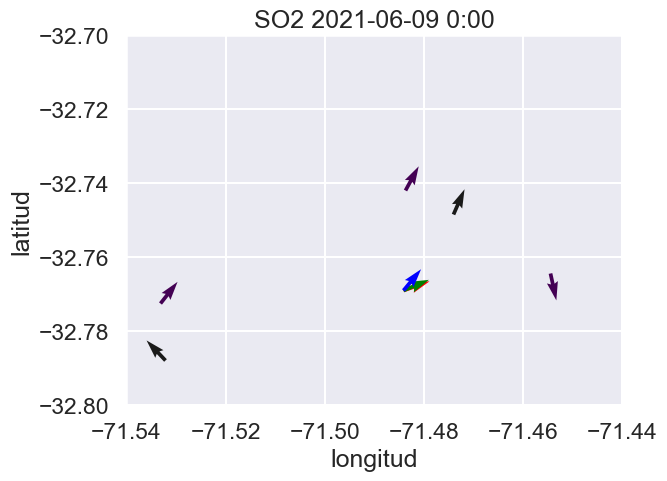

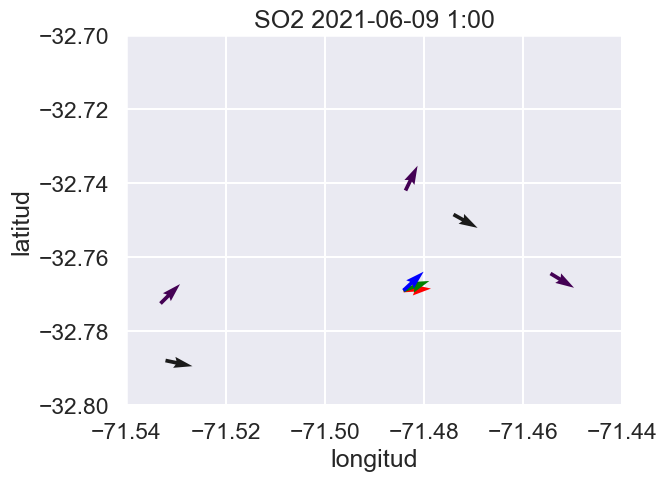

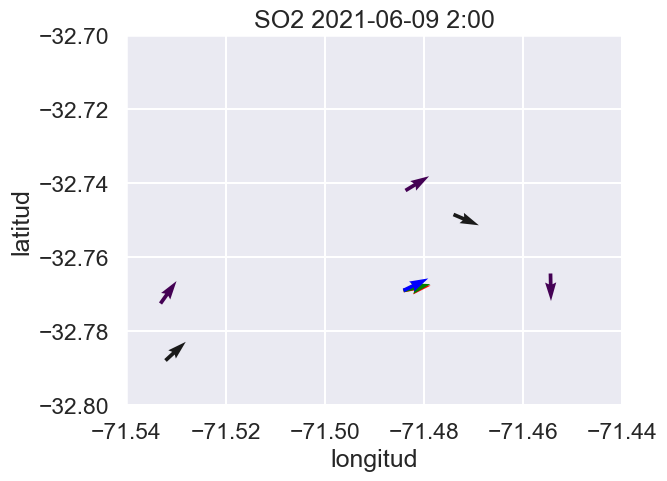

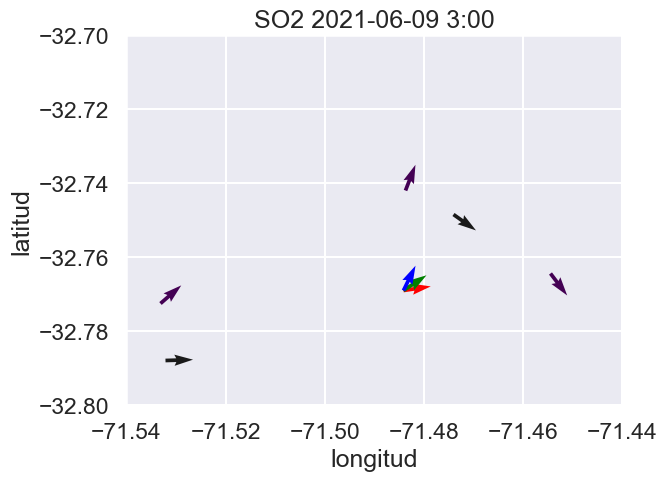

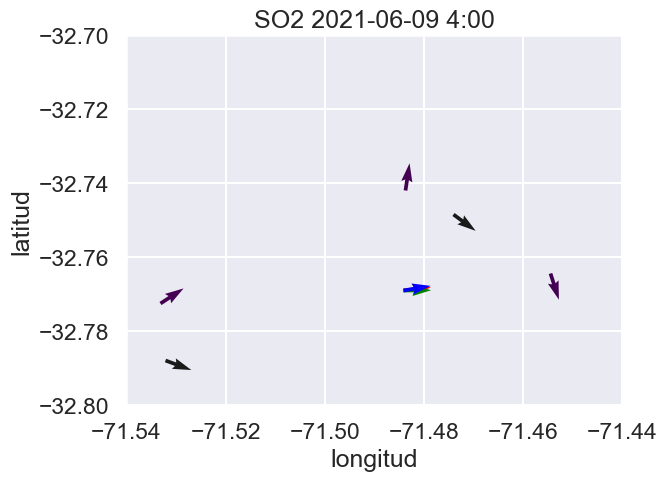

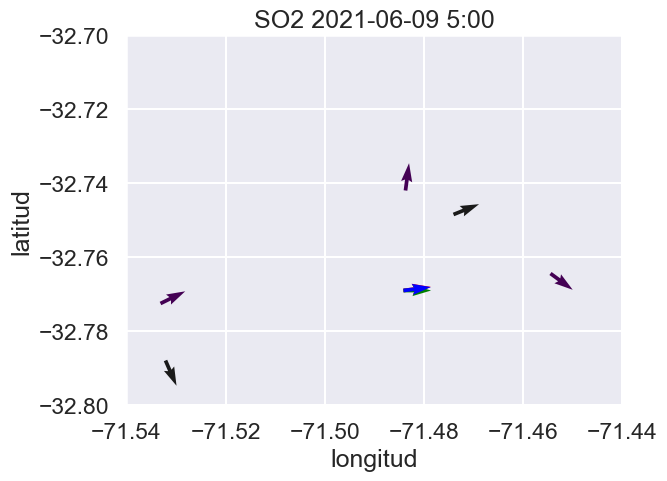

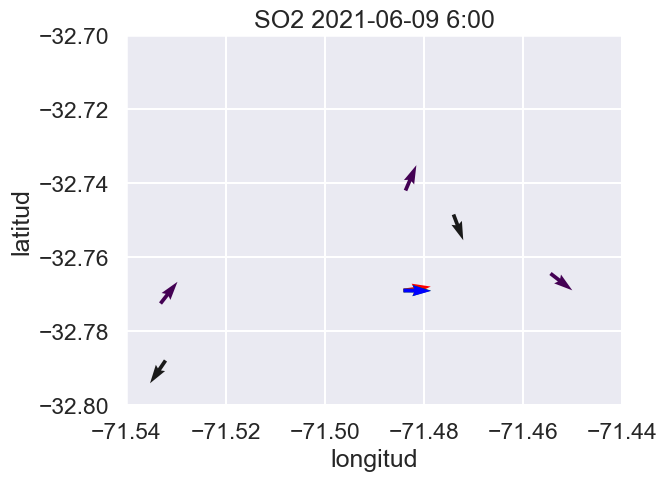

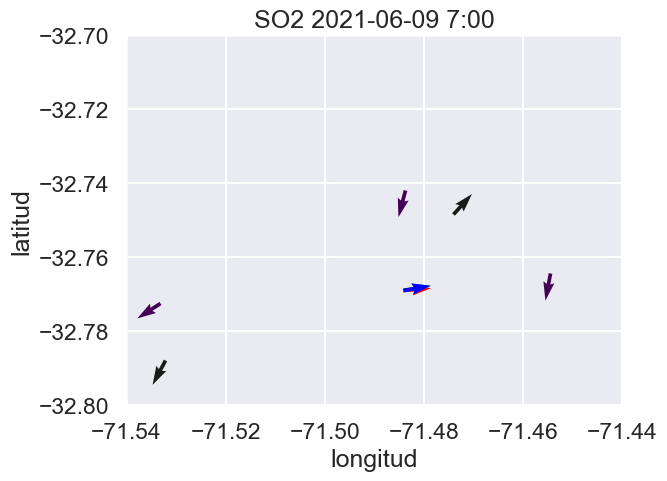

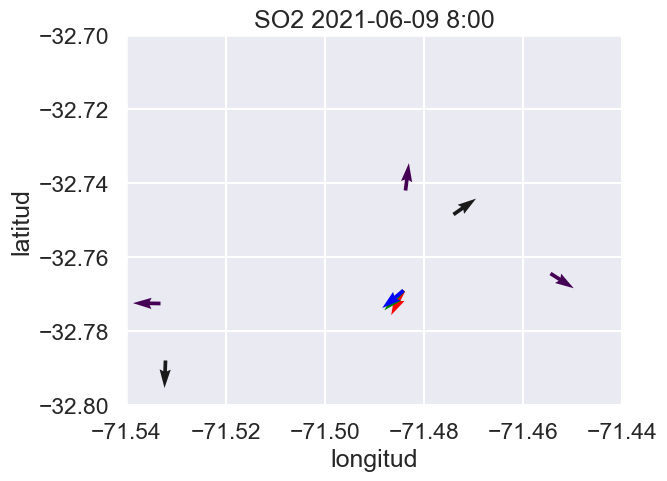

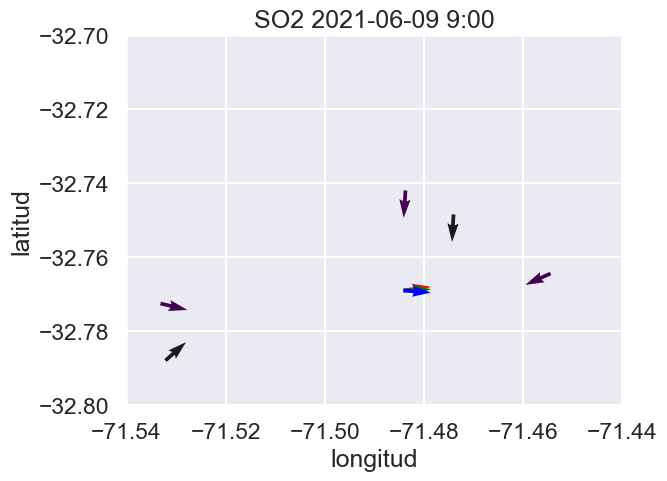

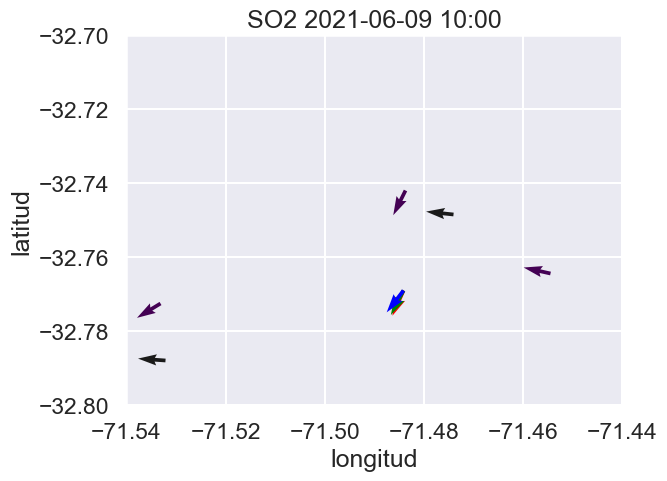

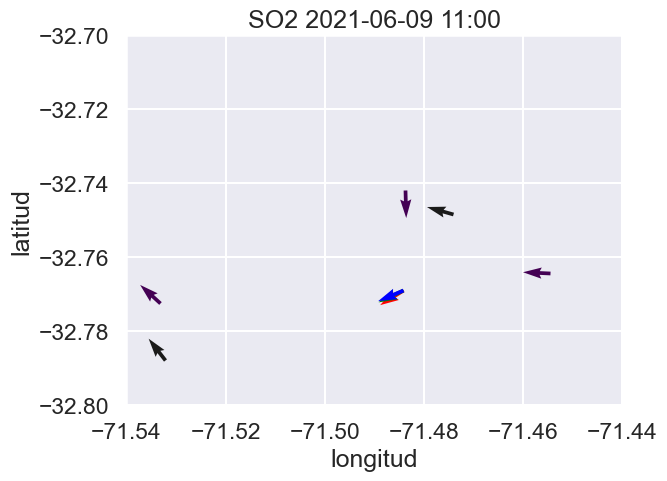

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\quiver.py:640: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


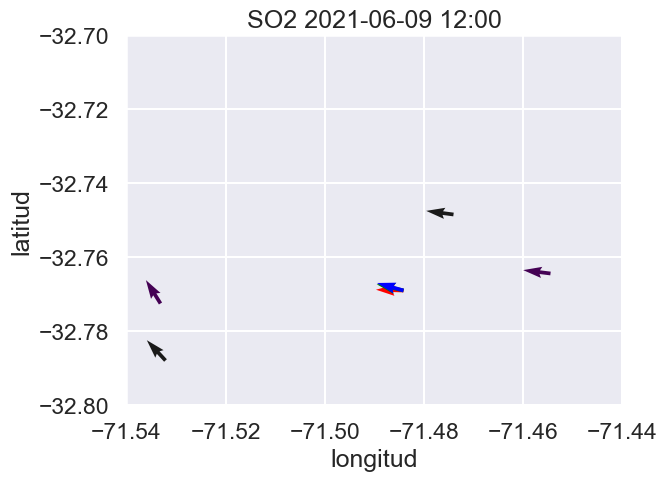

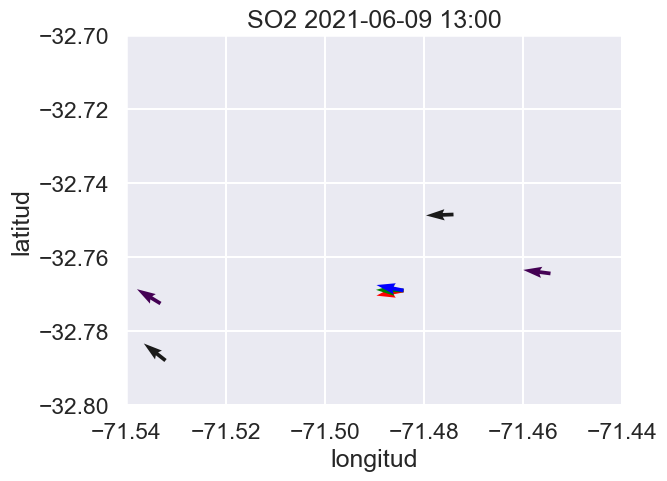

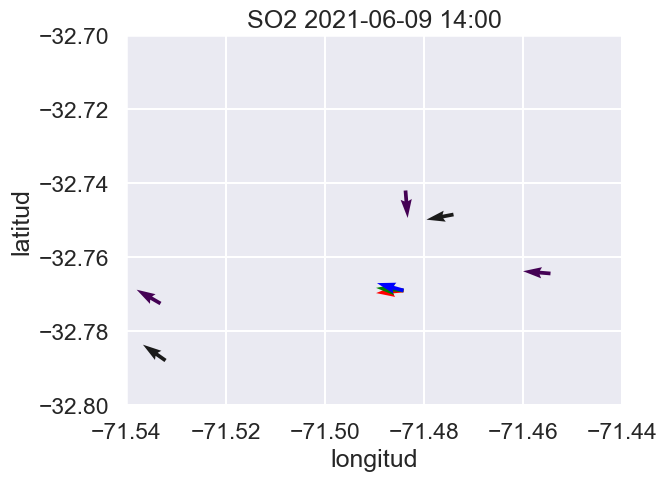

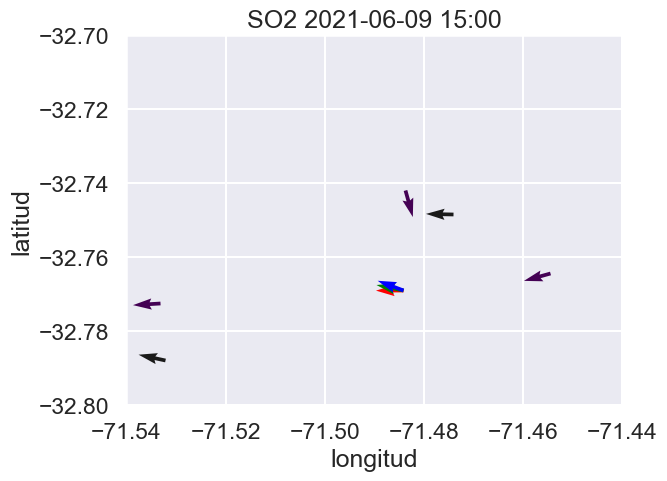

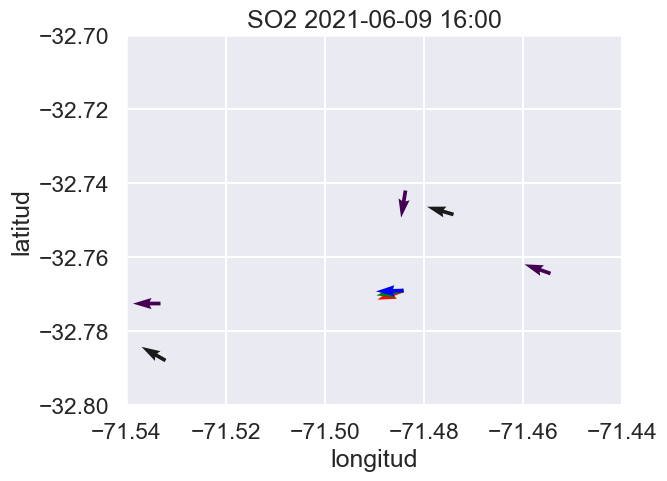

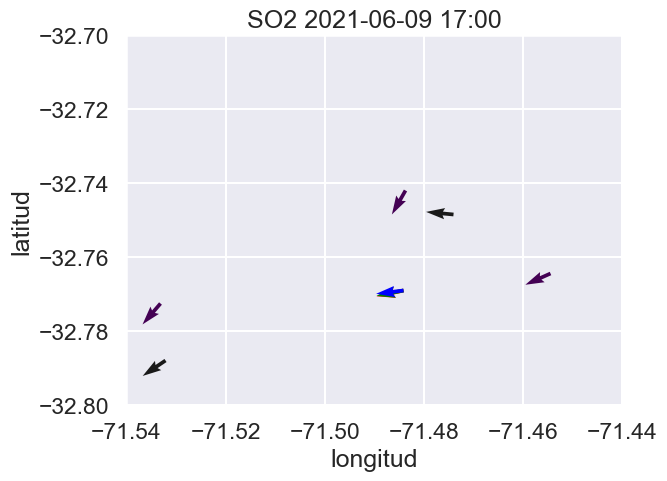

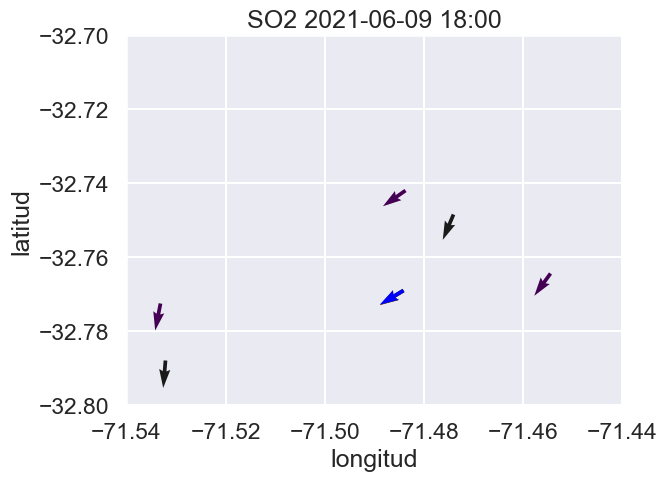

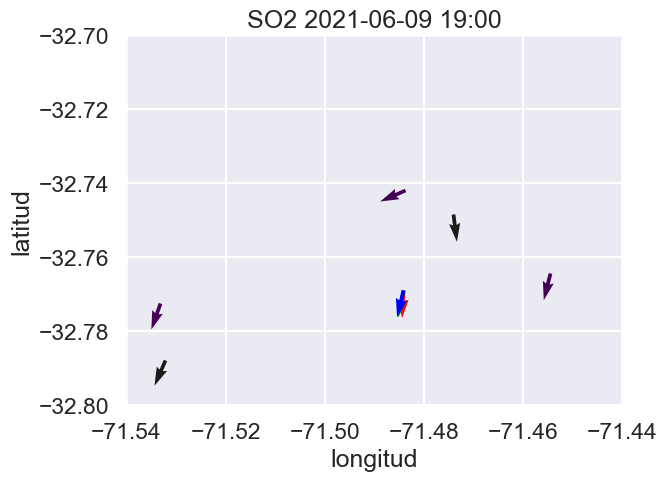

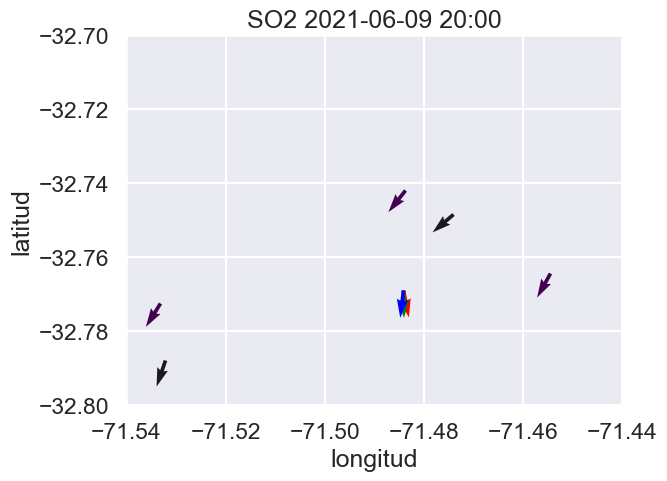

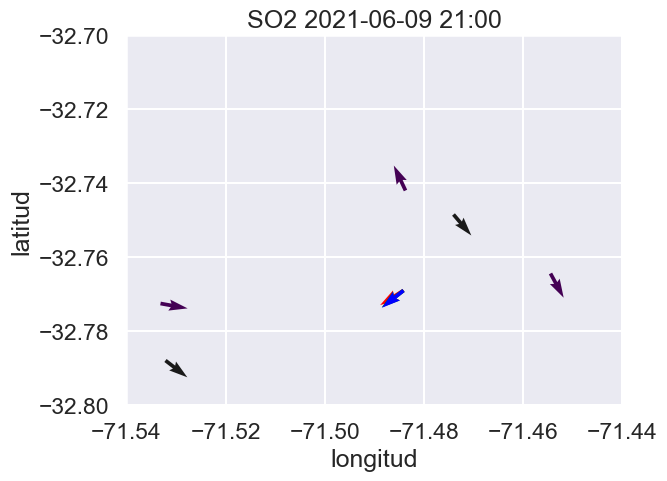

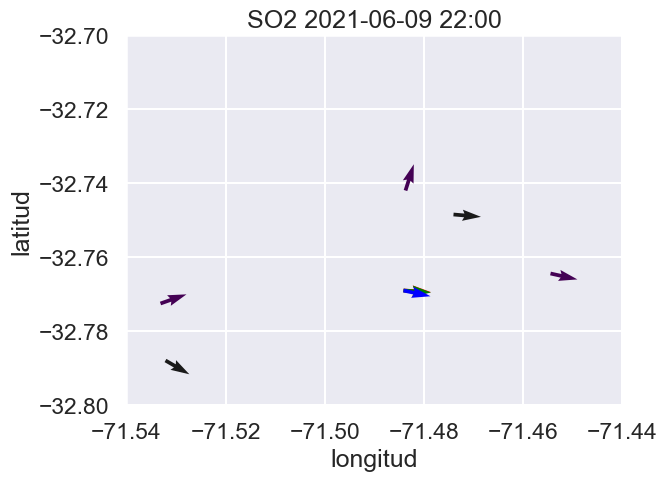

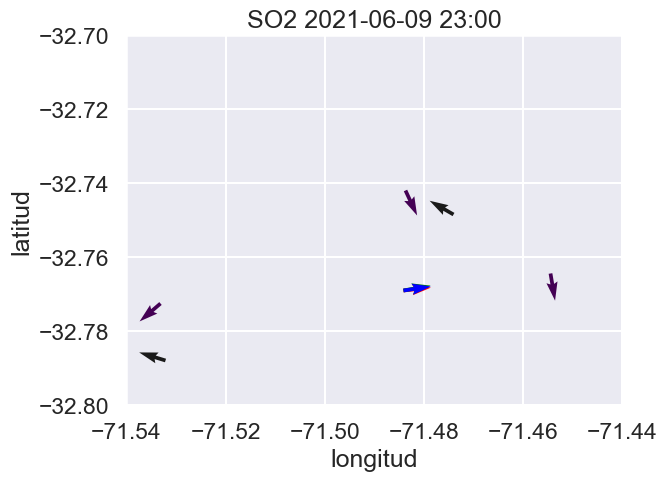

In [94]:
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
from IPython import display

#Día de peak en maitenes y quintero (2021-06-09)
df1 = frame_by_date(maitenes, common_dates[-1])
df2 = frame_by_date(quintero, common_dates[-1])
df3 = frame_by_date(ventanas, common_dates[-1])
df4 = frame_by_date(lagreda_vientos, common_dates[-1])
df5 = frame_by_date(centro_quintero, common_dates[-1])
df6 = frame_by_date(codelco, common_dates[-1])

u1, v1 = winds(df1)
u2, v2 = winds(df2)
u3, v3 = winds(df3)
u4, v4 = winds(df4)
u5, v5 = winds(df5)
u6, v6 = winds_codelco(df6)



for i in range(len(u1)):
    #plot = plt.figure(figsize = (7,7))
    plt.ylim(-32.8,-32.7)
    plt.xlim(-71.54,-71.44)
    plt.quiver(coord_maitenes['long'], coord_maitenes['lat'], v1[i], u1[i], df1["SO2"][i], cmap=cm.viridis)#, scale=maitenes.velviento[i]*10**-7, scale_units='inches')
    #plt.quiver(coord_maitenes['lat'], coord_maitenes['long'], u1[i], v1[i], df1["SO2"][i], cmap=cm.viridis)#, scale=maitenes.velviento[i]*10**-7, scale_units='inches')
    plt.quiver(coord_quintero['long'], coord_quintero['lat'], v2[i], u2[i], df2["SO2"][i], cmap=cm.viridis)#, scale=quintero.velviento[i]*10**-7, scale_units='inches')
    #plt.quiver(coord_quintero['lat'], coord_quintero['long'], u2[i], v2[i], df2["SO2"][i], cmap=cm.viridis)#, scale=quintero.velviento[i]*10**-7, scale_units='inches')
    plt.quiver(coord_ventanas['long'], coord_ventanas['lat'], u3[i], v3[i], df3["SO2"][i], cmap=cm.viridis)#, scale=ventanas.velviento[i]*10**-7)
    #plt.quiver(coord_ventanas['lat'], coord_ventanas['long'], u3[i], v3[i], df3["SO2"][i], cmap=cm.viridis)#, scale=ventanas.velviento[i]*10**-7)
    plt.quiver(coord_lagreda['long'],coord_lagreda['lat'],v4[i],u4[i], cmap=cm.viridis)#, scale=lagreda_vientos.velviento[i]*10**-7)
    #plt.quiver(coord_lagreda['lat'], coord_lagreda['long'], u4[i], v4[i], cmap=cm.viridis)#, scale=lagreda_vientos.velviento[i]*10**-7)
    plt.quiver(coord_centro_quintero['long'],coord_centro_quintero['lat'],v5[i],u5[i], cmap=cm.viridis)#, scale=centro_quintero.velviento[i]*10**-7
    plt.quiver(coord_codelco['long'],coord_codelco['lat'],v6[0][i],u6[0][i], color = 'red')#, cmap=cm.viridis, scale = codelco.WS_10[i]*10**-7)
    plt.quiver(coord_codelco['long'],coord_codelco['lat'],v6[1][i],u6[1][i], color = 'green')#,cmap=cm.viridis, scale = codelco.WS_20[i]*10**-7)
    plt.quiver(coord_codelco['long'],coord_codelco['lat'],v6[2][i],u6[2][i], color = 'blue')#,cmap=cm.viridis, scale = codelco.WS_30[i]*10**-7)
    #plt.quiver(coord_centro_quintero['lat'], coord_centro_quintero['long'], u5[i], v5[i], cmap=cm.viridis)#, scale=centro_quintero.velviento[i]*10**-7)
    #plt.quiver(coord_codelco['lat'], coord_codelco['long'], u6[0][i], v6[0][i], color = 'red')#, cmap=cm.viridis, scale = codelco.WS_10[i]*10**-7)
    #plt.quiver(coord_codelco['lat'], coord_codelco['long'], u6[1][i], v6[1][i], color = 'green')#,cmap=cm.viridis, scale = codelco.WS_20[i]*10**-7)
    #plt.quiver(coord_codelco['lat'], coord_codelco['long'], u6[2][i], v6[2][i], color = 'blue')#, cmap=cm.viridis, scale = codelco.WS_40[i]*10**-7)
    plt.xlabel('longitud')
    plt.ylabel('latitud')
    plt.title(f"SO2 {common_dates[-1]} {df1.index[i]}:00")
    plt.savefig(f"SO2_{common_dates[-1]}_{df1.index[i]}.png")
    plt.show()


In [ ]:
#Día de no peak
dates_no_peak = np.setdiff1d(maitenes.index.date, common_dates)

df1_1 = frame_by_date(maitenes, dates_no_peak[-1])
df2_1 = frame_by_date(quintero, dates_no_peak[-1])
df3_1 = frame_by_date(ventanas, dates_no_peak[-1])
df4_1 = frame_by_date(lagreda_vientos, dates_no_peak[-1])
df5_1 = frame_by_date(centro_quintero, dates_no_peak[-1])

u1_1, v1_1 = winds(df1_1)
u2_1, v2_1 = winds(df2_1)
u3_1, v3_1 = winds(df3_1)
u4_1, v4_1 = winds(df4_1)
u5_1, v5_1 = winds(df5_1)

for i in range(len(u1_1)):
    plot = plt.figure(figsize = (5,5))
    plt.xlim(-32.8,-32.7)
    #plt.ylim(-71.54,-71.44)
    plt.quiver(coord_maitenes['lat'], coord_maitenes['long'], u1_1[i], v1_1[i], df1_1["SO2"][i], cmap=cm.viridis)
    plt.quiver(coord_quintero['lat'], coord_quintero['long'], u2_1[i], v2_1[i], df2_1["SO2"][i], cmap=cm.viridis)
    plt.quiver(coord_ventanas['lat'], coord_ventanas['long'], u3_1[i], v3_1[i], df3_1["SO2"][i], cmap=cm.viridis)
    plt.quiver(coord_lagreda['lat'], coord_lagreda['long'], u4_1[i], v4_1[i], cmap=cm.viridis)
    plt.quiver(coord_centro_quintero['lat'], coord_centro_quintero['long'], u5_1[i], v5_1[i], cmap=cm.viridis)
    plt.title(f"SO2 {dates_no_peak[-1]} {df1_1.index[i]}:00")
    plt.show()

    

## Intento de GIF, fallé

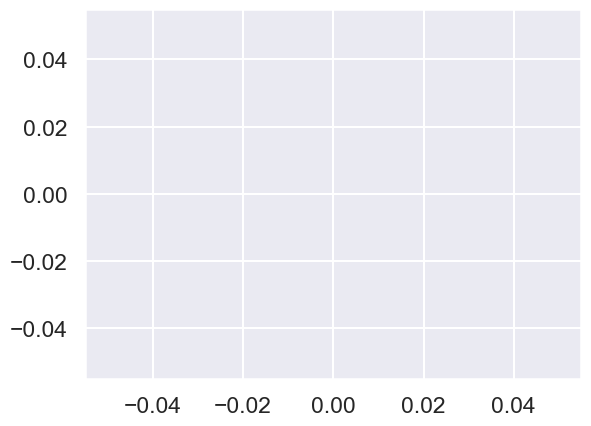

In [ ]:
line_plot = plt.plot([]) 

def animate(i):
    df1 = frame_by_date(maitenes, common_dates[i])
    df2 = frame_by_date(quintero, common_dates[i])
    df3 = frame_by_date(ventanas, common_dates[i])
    u1, v1 = winds(df1)
    u2, v2 = winds(df2)
    u3, v3 = winds(df3)
    line_plot = plt.quiver(coord_maitenes['lat'], coord_maitenes['long'], u1, v1, df1["SO2"], cmap=cm.viridis)
    line_plot = plt.quiver(coord_quintero['lat'], coord_quintero['long'], u2, v2, df2["SO2"], cmap=cm.viridis)
    line_plot = plt.quiver(coord_ventanas['lat'], coord_ventanas['long'], u3, v3, df3["SO2"], cmap=cm.viridis)
    plt.title(f"SO2 {common_dates[i]}")
    return line_plot


In [ ]:
anim = FuncAnimation(plt.gcf(), animate, frames=24, interval=1000)
plt.show()

#from IPython.display import HTML
html = display.HTML(anim.to_html5_video())
display.display(html)

<Figure size 640x480 with 0 Axes>

RuntimeError: Requested MovieWriter (ffmpeg) not available